a= 0.003935466275670985
error_a= 1.659159639778454e-07
R^2= 0.0015738244200949026


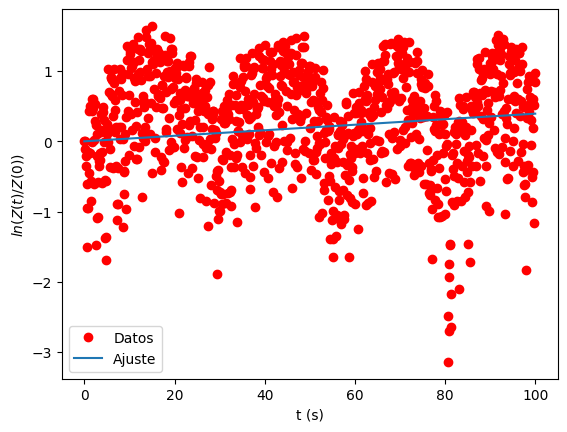

In [6]:
#Programa para calcular los coeficientes de Lyapunov a través de la distancia entre dos trayectorias infinitesimalmente cercanas

#Leemos los datos de uno de los ángulos y su respectiva velocidad angular para dos trayectorias distintas, con ángulos iniciales distintos pero cercanos

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats
import math

#importación de los datos
pend_1= np.loadtxt("O1_vO1_15_pi_4.dat")  #lee string y lo convierte en valor numérico
pend_2 = np.loadtxt("O1_vO1_15_pi_5.dat")

O_1 = pend_1[:,0]
vO_1 = pend_1[:,1]

O_2 = pend_2[:,0]
vO_2 = pend_2[:,1]


#como la representación se realiza en función del tiempo, recorreremos el tiempo desde 0 hasta el tmax establecido en el programa principal, 
#con paso 0.1, también establecido en el programa principal
tmax = 100
t = np.linspace(0,tmax,tmax*10) 



#una vez establecido el tiempo y leidos los datos de ángulos y velocidades angulares para cada iteración, puedo calcular la distancia entre trayectorias
Zt = [0]*(tmax*10) #vector para que almacene los datos de todos los instantes de tiempo
valor_y=[0]*(tmax*10)
for i in range(tmax*10):  
    Zt[i] = math.sqrt(pow(O_1[i]-O_2[i],2)+pow(vO_1[i]-vO_2[i],2))
    Z_ini = Zt[0]
    valor_y[i]=Zt[i]/Z_ini


#teniendo el tiempo y las distancias, podemos hacer el ajuste lineal
#definimos funcion del ajuste
def func(x,a):
    return a*x


#datos del ajuste
xdata = t
ydata = np.log(valor_y)

#hacemos el ajuste lineal
popt, pcov =curve_fit(func, xdata, ydata) 

stats=scipy.stats.linregress(xdata,ydata)

#ploteamos el ajuste
plt.plot(xdata, ydata, 'ro', label='Datos') 
plt.plot(xdata, func(xdata, *popt), label='Ajuste')

#imprimimos los datos del ajuste (pendiente con su error y R²)
print("a=",popt[0])
print("error_a=",pcov[0,0])
print("R^2=",stats.rvalue**2)

plt.xlabel('t (s)')
plt.ylabel('$ln(Z(t)/Z(0))$')
plt.legend()